In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
import os
import pickle


In [2]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 26, activation = 'softmax'))


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [3]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    directory = 'Training',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'

)

test_generator = test_datagen.flow_from_directory(
    directory = 'Testing',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'

)

Found 501 images belonging to 26 classes.
Found 260 images belonging to 26 classes.


In [8]:

history = model.fit(train_generator,
                         steps_per_epoch = 16,
                         epochs = 25,
                         validation_data = test_generator,
                         validation_steps = 16)

Epoch 1/25
16/16 [==============================] - 1s 36ms/step - loss: 0.1800 - accuracy: 0.9301 - val_loss: 0.2589 - val_accuracy: 0.9115
Epoch 2/25
16/16 [==============================] - 0s 29ms/step - loss: 0.1698 - accuracy: 0.9281
Epoch 3/25
16/16 [==============================] - 0s 29ms/step - loss: 0.1564 - accuracy: 0.9202
Epoch 4/25
16/16 [==============================] - 0s 30ms/step - loss: 0.1677 - accuracy: 0.9162
Epoch 5/25
16/16 [==============================] - 0s 30ms/step - loss: 0.1497 - accuracy: 0.9381
Epoch 6/25
16/16 [==============================] - 0s 30ms/step - loss: 0.1649 - accuracy: 0.9321
Epoch 7/25
16/16 [==============================] - 0s 30ms/step - loss: 0.1290 - accuracy: 0.9401
Epoch 8/25
16/16 [==============================] - 0s 30ms/step - loss: 0.1253 - accuracy: 0.9421
Epoch 9/25
16/16 [==============================] - 0s 30ms/step - loss: 0.1896 - accuracy: 0.9142
Epoch 10/25
16/16 [==============================] - 0s 29ms/step -

In [9]:
def get_result(result):
    if result[0][0] == 1:
        return('a')
    elif result[0][1] == 1:
        return ('b')
    elif result[0][2] == 1:
        return ('c')
    elif result[0][3] == 1:
        return ('d')
    elif result[0][4] == 1:
        return ('e')
    elif result[0][5] == 1:
        return ('f')
    elif result[0][6] == 1:
        return ('g')
    elif result[0][7] == 1:
        return ('h')
    elif result[0][8] == 1:
        return ('i')
    elif result[0][9] == 1:
        return ('j')
    elif result[0][10] == 1:
        return ('k')
    elif result[0][11] == 1:
        return ('l')
    elif result[0][12] == 1:
        return ('m')
    elif result[0][13] == 1:
        return ('n')
    elif result[0][14] == 1:
        return ('o')
    elif result[0][15] == 1:
        return ('p')
    elif result[0][16] == 1:
        return ('q')
    elif result[0][17] == 1:
        return ('r')
    elif result[0][18] == 1:
        return ('s')
    elif result[0][19] == 1:
        return ('t')
    elif result[0][20] == 1:
        return ('u')
    elif result[0][21] == 1:
        return ('v')
    elif result[0][22] == 1:
        return ('w')
    elif result[0][23] == 1:
        return ('x')
    elif result[0][24] == 1:
        return ('y')
    elif result[0][25] == 1:
        return ('z')

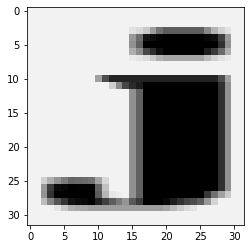

In [10]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# img=mpimg.imread('image_name.png')
filename = r'Testing\j\21.png'
test_image = image.load_img(filename, target_size = (32,32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

In [11]:

result = model.predict(test_image)
result = get_result(result)
print ('Predicted Alphabet is: {}'.format(result))

Predicted Alphabet is: j
